# Predicting heart disease using Machine learning

uses data science libraries for building machine learning model for predicting whether or not someone has heart disease based on their medical attributes

1. Problem definition
2. data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## Problem definition

Binary classification


## Data

The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/ronitf/heart-disease-uci

## Evaluation 

> If the project can reach 95% accuracy of predicting whether or not an individual is having heart disease, then this project can be pursued


## Features

Different information about each of the features in data

**Create data dictionary**

* age - age in years
* sex - (1 = male; 0 = female)
* cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
* trestbps - resting blood pressure (in mm Hg on admission to the hospital) 
* chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
* restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
* thalach - maximum heart rate achieved
* exang - exercise induced angina (1 = yes; 0 = no)
* oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
* slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
* ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
* thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
* target - have disease or not (1=yes, 0=no) (= the predicted attribute)

### Preparing the tools
using pandas, Matplotlib, numpy for data analysis

In [1]:
# Importing the tools

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Sklearn models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load data


In [3]:
df = pd.read_csv("heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Data exploration (Exploratory data analysis)

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
## How many of ch class there
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

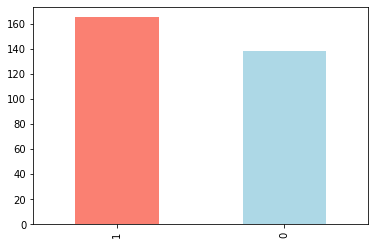

In [9]:
df["target"].value_counts().plot(kind="bar", color = ['salmon',"lightblue"]);

In [10]:
## finding out whether there are any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Finding patterns
## Heart disease Frequency according to sex

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

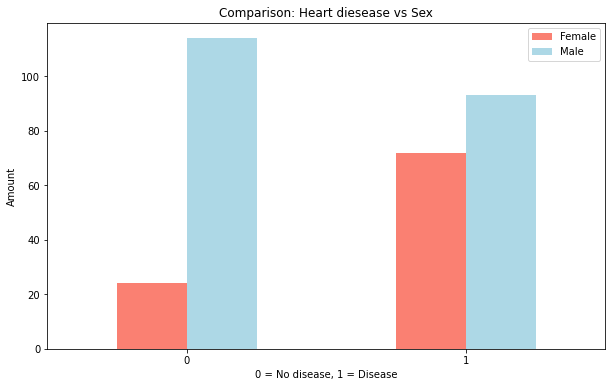

In [16]:
## Create a plot of the comparison
pd.crosstab(df.target, df.sex).plot(kind = "bar",
                                   figsize=(10,6),
                                   color = ["salmon", "lightblue"]);
plt.title("Comparison: Heart diesease vs Sex")
plt.xlabel("0 = No disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation = 0)

### Age vs Max heart rate for Heart disease

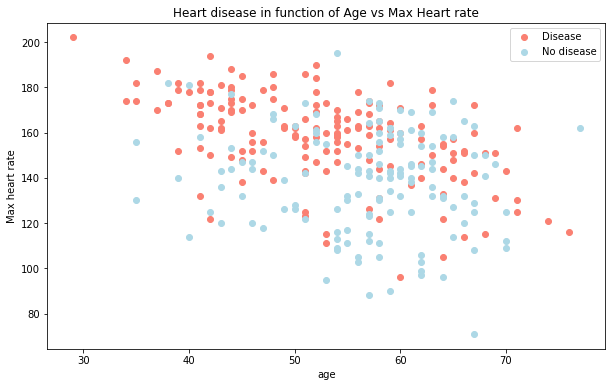

In [20]:
# creating another figure
plt.figure(figsize=(10,6))
#scatter with positive examples
plt.scatter(df.age[df.target == 1],
           df.thalach[df.target == 1],
           c = "salmon");
#scatter with positive examples
plt.scatter(df.age[df.target == 0],
           df.thalach[df.target == 0],
           c = "lightblue");
# information
plt.title("Heart disease in function of Age vs Max Heart rate")
plt.xlabel("age")
plt.ylabel("Max heart rate")
plt.legend(["Disease", "No disease"])

The above scatter shows younger someones age, they have higher heart rate.
##### The patterns that we can't see straightaway, ML is going to dive into the data nd help to figure that out for us

### distribution of AGE over histogram

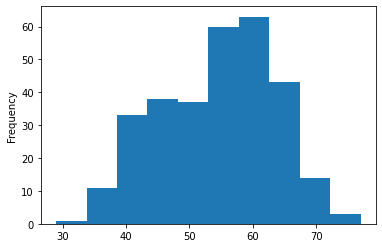

In [22]:

df.age.plot.hist();

### Heart disease frequency per Chest pain Type
* cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

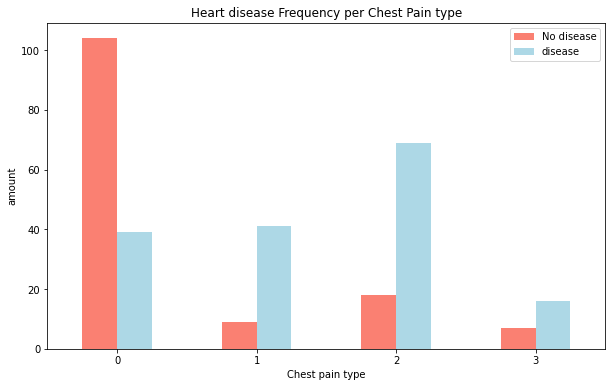

In [28]:
pd.crosstab(df.cp, df.target).plot(kind = "bar",
                                   figsize = (10,6),
                                color = 
                                   ['salmon', "lightblue"])
plt.title("Heart disease Frequency per Chest Pain type")
plt.xlabel("Chest pain type")
plt.ylabel("amount")
plt.legend(["No disease", "disease"])
plt.xticks(rotation = 0)

### Building a correlation matrix

To see how each independent variables are related to each other

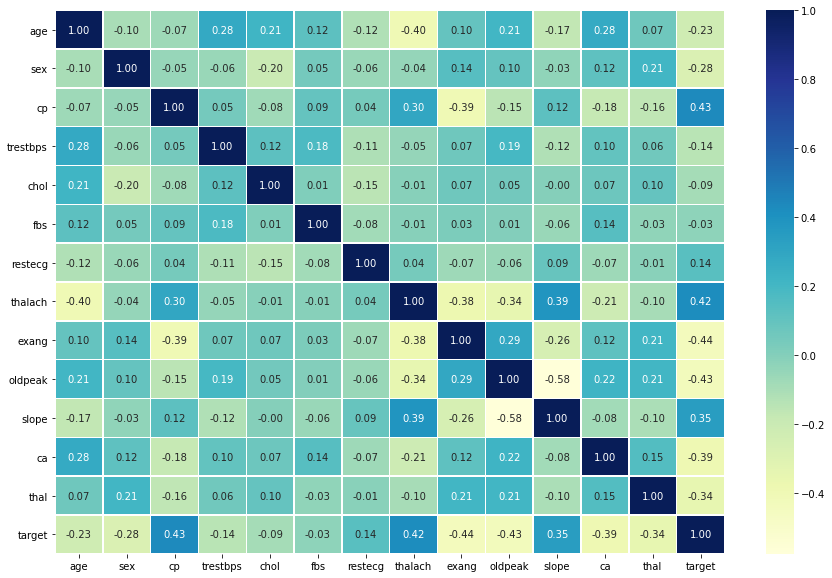

In [32]:
# lets make correlation matrix visual 
corr_matrix = df.corr() # forming the correlation matrix
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix,
                annot = True, # annotating the boxes with info
                linewidths = 0.5,
                fmt = ".2f",
                cmap = "YlGnBu") # formats : 2 decimal places

Diagonal elements shows perfect correlation; like age showing perfecr correlation to age column
Higher positive value shows higher potential positive correlation value
*** cp is positively correlated with target variable ***
*** exang is negatively correlated with target variable ***

## Modelling


In [33]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [35]:
# split data into X and y
X = df.drop("target", axis = 1) # everything except the target variable

y = df["target"] # just the target variable

In [36]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [37]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [38]:
# split data into training and testing sets
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                   test_size = 0.2)

In [39]:
X_train # now has 80% of data for training

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [41]:
X_test # remaining 20% for testing

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


### Its time to build a ML model. 
Train it on training set (find the pattern)
and test on testing set (test the pattern)

Three different ML models would be tried here:
1. Logistic Regression
2. K-Nearest Neighbors Classifiers
3. Random Forest Classifiers

In [42]:
# putting models in dictionary 
models  = {"Logistic regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

#create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models: dict of different ml models
    X_train: training data 
    X_test: testing data
    Y_train: training data
    Y_test: testing data 
    """
    # setting random seed
    np.random.seed(42)
    # making dictionary to keep model scores
    model_scores = {}
    # loop through models
    for name, model in models.items():
        #fit model to the data
        model.fit(X_train, y_train)
        #evaluate model and append score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [47]:
model_scores = fit_and_score(models = models,
                            X_train = X_train,
                            X_test = X_test,
                            y_train = y_train,
                            y_test = y_test)
model_scores

C:\Machine_learning\heart-disease\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparison

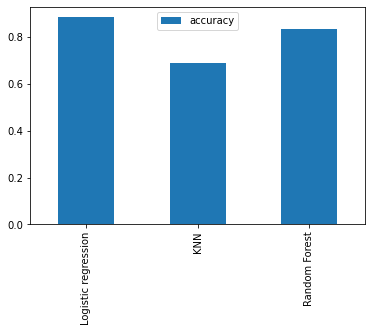

In [45]:
model_compare = pd.DataFrame(model_scores, index = ["accuracy"])
model_compare.T.plot.bar()

Now there are just initial predictions, so we cannot completely base our next steps on it 

### Classification report anatomy 

* Precision: Indicates the proporion of positive identifications (model predicted class 1) which were actually correct. Precision is 1.0 when model produces no false positives
* Recall: Indicates the proportion of actual positives which were classified correctly. Recall is 1.0 when model produces no false negatives.  

Let's look for he following:
* HyperParameter tuning (changing the settings for same model and observe)
* Feature importance
***** Specific to classification problems *****
* confusion matrix
* cross validation
* Precision
* Recall
* F1 score
* Classification Report
* ROC curve
* Area under the curve (AUC)

### Hyper parameter tuning 

##### Tuning KNN

In [49]:
train_scores = []
test_scores = []

# create list of different values for n_neighbors 
#(no. of neighbors used for queries)
neighbors = range(1, 21)

# setting knn instance
knn = KNeighborsClassifier()

# loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    #fit algo 
    knn.fit(X_train, y_train)
    
    # update training score list
    train_scores.append(knn.score(X_train, y_train))
    
    # update test score list 
    test_scores.append(knn.score(X_test, y_test))

Max KNN score on test data:  75.41%


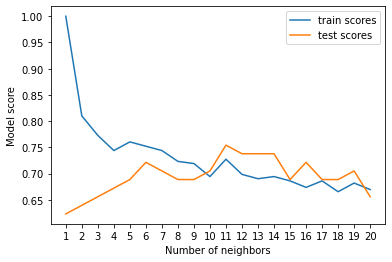

In [53]:
plt.plot(neighbors, train_scores, label = "train scores")
plt.plot(neighbors, test_scores, label= "test scores")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Max KNN score on test data: {max(test_scores) * 100: .2f}%")

N-neighbors of 11 gives the best result for our test dataset 
So, thats ho the performance for our KNN can be increased.
However, still it is quite less that Logistic regression and Random Forest classifier, then we can say that 
* KNN won't be effective for our Heart-disease prediction

## Hyper parameter tuning with RandomizedSearch CV
(Cross validation)
##### Tuning Logistic Regression and RanomForest classifier 

In [58]:
# create hyper parameter grid for Logistic Regression
# can do on any bunch of parameters 
# below we are creating a grid of numbers of logspace between -4 and 4  
log_reg_grid = {"C": np.logspace(-4, 4, 20),
               "solver": ["liblinear"]}

#create hyper paramter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2)}

`After getting the hyper parameter grids for our models, now we can tune them using RandomizedSearchCV

In [55]:
# Tune Logistic Regression

np.random.seed(42)

#setup random hyperparamter search
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions = log_reg_grid,
                               cv = 5,
                               n_iter=20,
                               verbose= True)
#Fit random hyper paramter for Logistic Regression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [57]:
# Score after tuning Logistic Regression
rs_log_reg.score(X_test,y_test)

0.8852459016393442

##### The Logistic Regression score is the same as was before tuning the Model 


In [59]:
# tune Random Forst Classifier 

np.random.seed(42)

# setup random hyper paramter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions = rf_grid,
                          cv = 5,
                          n_iter = 20,
                          verbose = True)
# Fit Random hyper parameter search model 
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.4min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [60]:
# Evaluate Randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.8688524590163934

###### So, Random Forest Classifier model accuracy improved after tuning

### Hyper paramter Tuning Using GridSearch CV

AS Logistic Regression model has been providing the best score as of now

In [63]:
# Different hyper paramters for our Logistic Regresion model 
# increasing the number of parameters 
log_reg_grid = {"C": np.logspace(-4, 4, 30),
               "solver": ["liblinear"]}

#setup GirdSearch 
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid = log_reg_grid,
                         cv = 5,
                         verbose = True)
# Fit grid hyperparamter model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.7s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [64]:
# Evaluate Grid Search
gs_log_reg.score(X_test, y_test)

0.8852459016393442

##### So, Logisitc Regression still gives the best accuracy compared to the other two ML models

## Evaluating tuned ML classifier model, beyond Accuracy

* ROC curve and AUC curve
* Confusion matrix
* Classification Report
* Precision
* Recall
* F1 score

In [65]:
# Make predictions with TUNED MODEL

y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

##### ROC curve is created by plotting True Positives against false positives

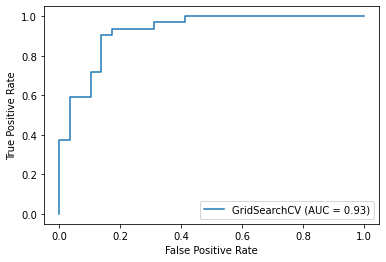

In [66]:
# import ROC curve function 
from sklearn.metrics import plot_roc_curve

# plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test)

##### Beautiful! AUC = 0.93; the model edges close to a perfect model

##### Now, Confusion matrix 

[[25  4]
 [ 3 29]]


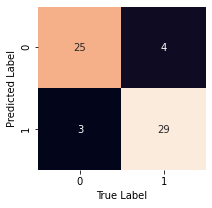

In [70]:
print(confusion_matrix(y_test, y_preds))

# seaborn for visualizing
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn heatmap
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot = True,
                    cbar = False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    
plot_conf_mat(y_test, y_preds)

##### Now we have a ROC curve, AUC metric and Confusion matrix
##### Time to go for Classification Report, Precision, Recall and F1 score

### Calculate Evaluation metrics using CV

##### Precision, F1 and Recall usin CV cross_val_score()

In [73]:
# checking best hyper paramters 
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [74]:
# create new classifier with best paramters found
clf = LogisticRegression(C=0.20433597178569418,
                        solver= "liblinear")

In [86]:
# CROSS VALIDATED ACCURACY
cv_accuracy = cross_val_score(clf,
                             X,
                             y,
                             cv =5,
                             scoring="accuracy")
cv_accuracy
# getting the MEAN of Cross Validated ACCURACY
cv_accuracy = np.mean(cv_accuracy)
cv_accuracy

0.8446994535519124

In [83]:
# CROSS VALIDATED PRECISION
cv_precision = cross_val_score(clf,
                             X,
                             y,
                             cv =5,
                             scoring="precision")
cv_precision
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [84]:
#CROSS VALIDATED RECALL
cv_recall = cross_val_score(clf,
                             X,
                             y,
                             cv =5,
                             scoring="recall")
cv_recall
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [85]:
#CROSS VALIDATED F1
cv_f1 = cross_val_score(clf,
                             X,
                             y,
                             cv =5,
                             scoring="f1")
cv_f1
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

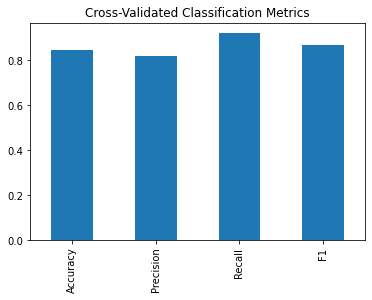

In [87]:
# Visualizing CROSS VALIDATED METRICS
cv_metrics = pd.DataFrame({"Accuracy": cv_accuracy,
                          "Precision": cv_precision,
                          "Recall": cv_recall,
                          "F1": cv_f1},
                         index = [0])

cv_metrics.T.plot.bar(title="Cross-Validated Classification Metrics",
                     legend = False)

### The above Classification Metrics is for Grid SearchCV Logistic Regression Model as it provided the best results 

## Feature Importance

Which feature contributed the most to the outcomes of model

In [101]:
# Fit instance of Logisitic Regression 

gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [106]:
clf = LogisticRegression(C=0.20433597178569418,
                       solver = "liblinear")
clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [108]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [105]:
# check coefficient 
# gives the value or each of the independent variables contributes to the target labels
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [107]:
# MAtch coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

This tells us how much each of these contribute to predicting the target variable 

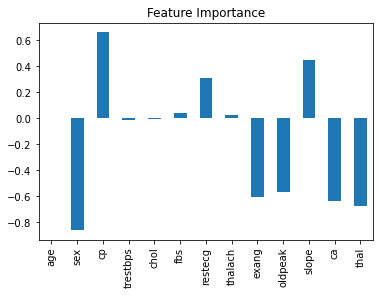

In [109]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend = False)

If a value is negative, that means it is Negatively Correlated

In [111]:
# EXAMPLE
pd.crosstab(df['slope'],df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


* slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart